# Many with astrocytes

Let $A_i$ denote an $N_z$ by $N_z$ matrix encoding the synaptic connections controlled by astrocyte $i$.

$$
\begin{eqnarray*}
    \dot{z_i} & = & z_i ( (\lambda_i + \mathrm{i}) + b_i |z_i|^2) + \sum_k W_{ik} z_k \\
    \dot{a_i} & = & \theta \left(\left(\frac{1}{N_a} \sum_k a_k\right) - a_i\right) + \varphi \left( \sum_k B_{ik} |z_k| \right) - \kappa a_i \\
    \dot{W} & = & \left\{\alpha\left( I_{N_z} - \mathbf{z} \bar{\mathbf{z}}^\top \right)\right\}_? - \beta\left( \sum_k a_k A_k \right) \circ W
\end{eqnarray*}
$$

In [10]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [11]:
Nz = 20
Na = 20

# Hopf oscillator characteristics
l = np.random.randn( Nz )
# TODO Should the Lyopunov exponent vary across oscillators?
b = -0.1 + np.random.randn( Nz ) * 1.j

alpha = 0.001 # 0.1
beta = 0.01

theta = 0.01
phi = 0.01
kappa = 0.1

In [12]:
A = []
for i in range( Na ):
    A.append( np.random.exponential( size = (Nz, Nz) ) )
    
B = np.zeros( (Na, Nz) )
for i in range( Na ):
    for k in range( Nz ):
        B[i, k] = np.sum( A[i][:, k] )

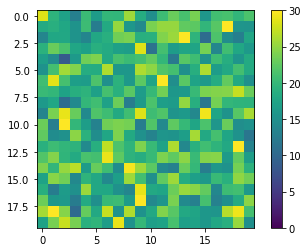

In [13]:
plt.imshow( B )
plt.clim( 0, 30 )
plt.colorbar()

In [14]:
def deriv( t, y ):
    
    z = y[:Nz]
    a = y[Nz:(Nz+Nz)]
    W = np.reshape( y[(Nz+Na):], (Nz, Nz) )
    
    z_dot = np.zeros( z.shape[0], dtype = np.complex )
    for i in range( z_dot.shape[0] ):
        z_dot[i] = z[i] * ( ( l[i] + 1.j ) + b[i] * z[i] * np.conj( z[i] ) )
        for k in range( z_dot.shape[0] ):
#             if k == i:
#                 continue
#             z_dot[i] += W[i, k] * np.real( z[k] )
            z_dot[i] += W[i, k] * z[k]
    
    a_dot = np.zeros( a.shape[0], dtype = np.complex )
    a_bar = (1. / a.shape[0]) * np.sum( a )
    for i in range( a_dot.shape[0] ):
        a_dot[i] = theta * (a_bar - a[i])
        for k in range( z_dot.shape[0] ):
            a_dot[i] += phi * B[i, k] * np.abs( z[k] )
    a_dot -= kappa * a
    
#     W_dot = alpha * ( np.eye( Nz ) - np.outer( np.real( z ), np.real( z ) ) )
    W_dot = alpha * ( np.eye( Nz ) - np.outer( z, np.conj( z ) ) )
#     W_dot = np.zeros( (Nz, Nz), dtype = np.complex )
    for k in range( a_dot.shape[0] ):
        W_dot += beta * ( a[k] * A[k] ) * W
    
    y_dot = np.zeros( y.shape[0], dtype = np.complex )
    y_dot[:Nz] = z_dot
    y_dot[Nz:(Nz+Na)] = a_dot
    y_dot[(Nz+Na):] = W_dot.flatten()
    
    return y_dot

In [15]:
t_span = [0, 1e3]
t_eval = np.arange( t_span[0], t_span[-1], 1e-2 )

In [16]:
# TODO Randomize the z0 in an intelligent way
z0 = np.zeros( (Nz,), dtype = np.complex )
for i in range( z0.shape[0] ):
    z0[i] = 0.01 + 0.j
    
# TODO Randomize the a0 in an intelligent way
a0 = np.random.exponential( size = (Na,) )
    
W0 = np.random.randn( Nz, Nz ) + np.random.randn( Nz, Nz ) * 1.j

In [17]:
y0 = np.zeros( (Nz + Na + Nz*Nz,), dtype = np.complex )
y0[:Nz] = z0
y0[Nz:(Nz+Na)] = a0
y0[(Nz+Na):] = W0.flatten()

In [ ]:
sol = scipy.integrate.solve_ivp( deriv, t_span, y0,
                                 t_eval = t_eval,
                                 method = 'BDF' )

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/integrate/_ivp/bdf.py:397: RuntimeWarning: invalid value encountered in subtract
  D[order + 2] = d - D[order + 1]


In [ ]:
t_star = sol.t
y_star = sol.y

z_star = y_star[:Nz, :]
a_star = y_star[Nz:(Nz+Na), :]
W_star = np.reshape( y_star[(Nz+Na):, :], (Nz, Nz, y_star.shape[1]) )

In [ ]:
plt.figure( figsize = (48, 6) )
plt.imshow( np.real( a_star ), aspect = 'auto',
            vmin = np.quantile( np.real( a_star ), 0.01 ),
            vmax = np.quantile( np.real( a_star ), 0.99 ) )

In [ ]:
plt.figure( figsize = (48, 6) )
plt.imshow( np.real( z_star ), aspect = 'auto',
            vmin = np.quantile( np.real( z_star ), 0.01 ),
            vmax = np.quantile( np.real( z_star ), 0.99 ) )